In [1]:
# Importing libraries
# we don't like warnings; you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [2]:
# Trying model off the shelf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
scaler = StandardScaler()

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [3]:
# Importing data
df_ks = pd.read_csv("../Data/Cleaned/latest_data.csv")

## Baseline Model -- Hand Picked
Can't do it on all features in the interest of time

### Use only top 10 most important features found from decision tree

In [4]:
df_ks = df_ks[['usd_goal_real', 'count_7_days', 'optimism', 'hours_since_last_project', 'duration_days', 'launch_day', 'deadline_day', 'blurb_length', 'launch_month', 'deadline_month', 'state']]

In [5]:
df_ks.columns

Index(['usd_goal_real', 'count_7_days', 'optimism', 'hours_since_last_project',
       'duration_days', 'launch_day', 'deadline_day', 'blurb_length',
       'launch_month', 'deadline_month', 'state'],
      dtype='object')

In [6]:
import timeit
import time
import datetime

In [7]:
num_to_test = 40000
max_train_time = 600

start = 0
stop = 0

feature_names = df_ks.drop(columns=['state']).columns
X_test = df_ks.iloc[range(0, num_to_test)][feature_names]
X_test_scaled = scaler.fit_transform(X_test)
y_test = df_ks.iloc[range(0, num_to_test)]['state']

df_ks.drop(range(0,40000), axis = 0, inplace = True)

num_samples = 8

num_samples_list = []
accuracy_list = []
time_list = []

In [8]:
knn = KNeighborsClassifier()

In [9]:
print(f"Testing on {num_to_test} samples")
print(f"Max train-test time: {max_train_time/60} minutes\n")

final_run = False

while stop - start < max_train_time and final_run == False:
    if  num_samples > df_ks.shape[0]:
        final_run = True
        num_samples = df_ks.shape[0]
        print(f"Testing on all ({num_samples}) training samples")
    else:
        print(f"{num_samples} training samples")
    
    cur_df_ks = df_ks.sample(num_samples, replace = True)
    
    start = timeit.default_timer()

    # Looking at all features (except for text, and generated)
    feature_names = cur_df_ks.drop(columns=['state']).columns
    X_train = cur_df_ks[feature_names]
    y_train = cur_df_ks.state
    
    # for kNN, we need to scale features
    X_train_scaled = scaler.fit_transform(X_train)

    knn.fit(X_train_scaled, y_train)

    knn_pred = knn.predict(X_test_scaled)
    stop = timeit.default_timer()
    
    acc = accuracy_score(y_test, knn_pred)
    
    print (f" Accuracy: {acc}")
    print(f" Time: {str(datetime.timedelta(seconds=stop-start))}\n")
    
    num_samples_list.append(num_samples)
    accuracy_list.append(acc)
    time_list.append(round(stop-start, 3))
    
    num_samples *= 2
    time.sleep(1)

Testing on 40000 samples
Max train-test time: 10.0 minutes

8 training samples
 Accuracy: 0.542125
 Time: 0:00:00.812917

16 training samples
 Accuracy: 0.49535
 Time: 0:00:00.802972

32 training samples
 Accuracy: 0.4831
 Time: 0:00:00.955540

64 training samples
 Accuracy: 0.5565
 Time: 0:00:00.847143

128 training samples
 Accuracy: 0.532675
 Time: 0:00:00.914399

256 training samples
 Accuracy: 0.5587
 Time: 0:00:01.153758

512 training samples
 Accuracy: 0.554925
 Time: 0:00:01.332597

1024 training samples
 Accuracy: 0.5534
 Time: 0:00:01.630482

2048 training samples
 Accuracy: 0.563625
 Time: 0:00:02.336049

4096 training samples
 Accuracy: 0.568925
 Time: 0:00:03.612288

8192 training samples
 Accuracy: 0.56845
 Time: 0:00:05.254379

16384 training samples
 Accuracy: 0.57325
 Time: 0:00:08.261942

32768 training samples
 Accuracy: 0.5771
 Time: 0:00:10.753572

65536 training samples
 Accuracy: 0.574825
 Time: 0:00:14.748218

131072 training samples
 Accuracy: 0.566975
 Time: 0

#### Timing looks irrelevant but can quickly ramp up when more features are added

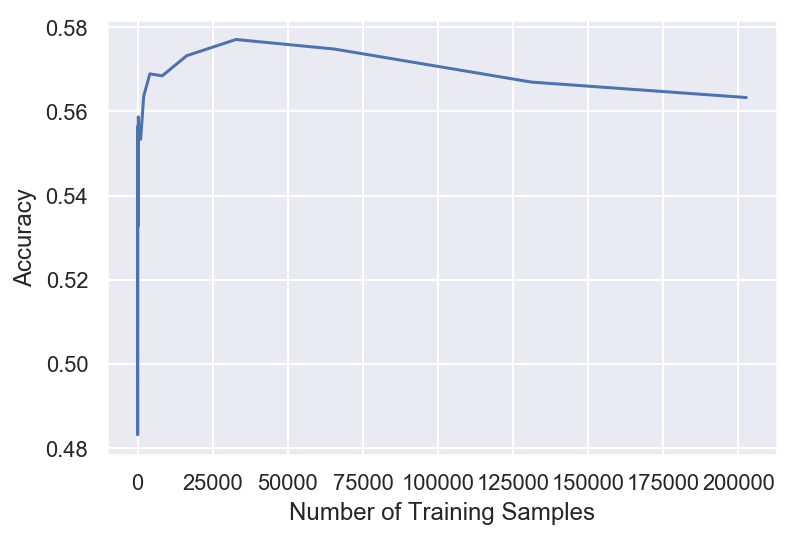

In [10]:
plt.plot(num_samples_list, accuracy_list)
plt.ylabel('Accuracy')
plt.xlabel('Number of Training Samples')
plt.show()

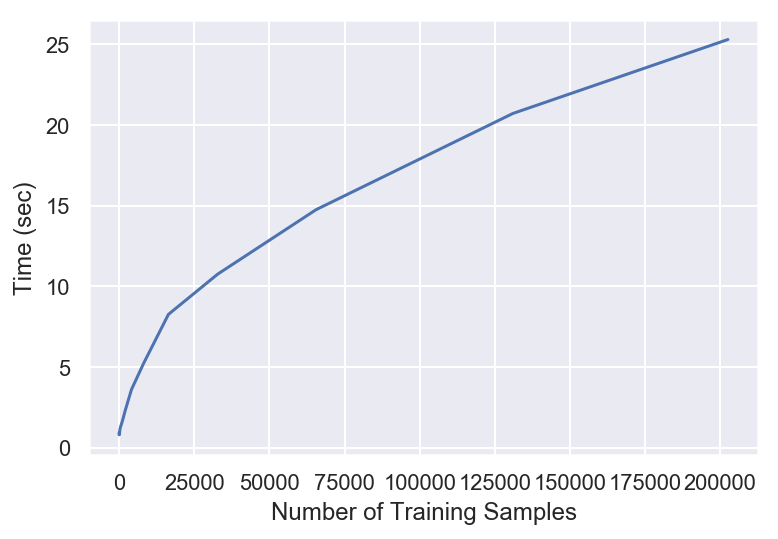

In [11]:
plt.plot(num_samples_list, time_list)
plt.ylabel('Time (sec)')
plt.xlabel('Number of Training Samples')
plt.show()